<a href="https://colab.research.google.com/github/Sar98/1D_heat_eqn/blob/main/1D_heat_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/SULI_Heat_eqn_codes/'

Mounted at /content/gdrive


The pythonization of a MATLAB script
## Solution of a 1D heat equation using foward, backward, and central difference approximations.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# variables
L = 3       # rod length (3 in this case so that the final plot is symmetric and shows the oscillations from the initial conditions)
T = .3      # total time (s)
k = .5      # thermal diffusivity constant  
N = 24      # number of spatial steps
M = 3#50      # number of time steps
dx = L/N    # delta x  
dt = T/M    # delta t
alpha = k*dt/dx**2

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00643290e-01 -1.19980647e-01 -1.30136326e+00
  -5.41750395e+00 -1.87340911e+01 -6.12792619e+01 -1.97153394e+02
  -6.31518866e+02 -2.02096101e+03 -6.46663321e+03 -2.06923088e+04
  -6.62141352e+04 -2.11883834e+05 -6.78026940e+05 -2.16968515e+06
  -6.94299185e+06 -2.22175738e+07 -7.10962366e+07 -2.27507958e+08
  -7.28025467e+08 -2.32968150e+09  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
   1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
   1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
  -1.000

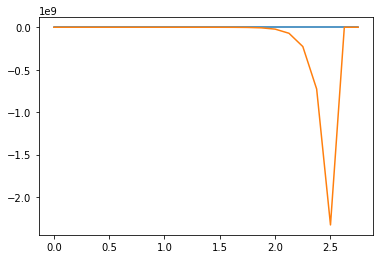

In [34]:
# Full set of positions

x = np.zeros(N)
t = np.zeros(M)

for i in range(N-1):
  x[i] = i*dx
for j in range(M-1):
  t[j] = j*dt

# Initial condition
u_0 = np.zeros(N)

for i in range(N-1):
  u_0[i] = np.sin(np.pi*x[i])

# Heat equation in terms of approximations with boundary conditions
u_1 = np.zeros(N)
u = np.zeros((M,N))

for j in range(M-1):
  for i in range(1, N-2):   # leaving out the boundaries
    u_1[i] = u_0[i] + alpha*(u_0[i+1] - 2*u_0[i] + u_0[i-1])

  u_1[0] = 0            # Dirchelet Condition
  u_1[N-1] = u_0[N-1]   # Neuman Condition
  #print(u_1[N-1])

  u[M-j-1,:] = u_0
  plt.plot(sorted(x),(u[M-j-1,:]))
  u_0 = u_1   # update u_0 and loop back

print(u)  # sanity check


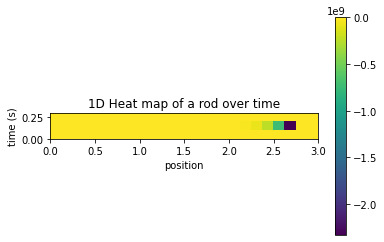

In [35]:
plt.imshow(u, extent=[0,L,0,T])
plt.colorbar()
plt.xlabel('position')
plt.ylabel('time (s)')
plt.title('1D Heat map of a rod over time')
plt.show()